In [17]:
import os, json, csv
from collections import defaultdict

osf_oi_preprint_sources = set()
sources_not_in_osf = set()
with open(os.path.join('..', '..', 'data_exploration_results', 'osf_io_preprint_search_sources.csv')) as f:
    reader = csv.DictReader(f)
    for row in reader:
        osf_oi_preprint_sources.add(row['Source'])
        if row['Other Source Name'] != '':
            osf_oi_preprint_sources.add(row['Other Source Name'])

sources = defaultdict(int)
sources_per_record = []
records_with_sources_not_in_osf = 0

with open(os.path.join('..', '..', 'data', 'share-jan-2019.json')) as f:
    for line in f:
        data = json.loads(line)
        for source in data['sources']:
            sources[source] += 1
        
        if len(set(data['sources']).intersection(osf_oi_preprint_sources)) == 0:
            not_in_osf = set(data['sources']) - osf_oi_preprint_sources
            if len(not_in_osf) > 0:
                sources_not_in_osf = sources_not_in_osf.union(not_in_osf)
            
            records_with_sources_not_in_osf += 1
            
        sources_per_record.append(len(data['sources']))

In [15]:
sources_not_in_osf

{'AgEcon Search',
 'BITSS',
 'BioMed Central',
 'CERN Document Server',
 'CSIR Researchspace',
 'Calhoun: Institutional Archive of the Naval Postgraduate School',
 'CrossRef',
 'DSpace at Texas State University',
 'DSpace@MIT',
 'DataCite MDS',
 'Deep Blue @ University of Michigan',
 'Department of Energy Pages',
 'Digital Commons @ Wayne State',
 'Digital.CSIC',
 "DoE's SciTech Connect Database",
 'Dryad Data Repository',
 'Eprints in Library and Information Science',
 'Ghent University Academic Bibliography',
 'Harvard Dataverse',
 'Hyper Articles en Ligne (HAL)',
 "Indiana University Libraries' IUScholarWorks",
 'KU ScholarWorks',
 'MOspace Institutional Repository',
 'Mason Archival Repository Service',
 'PubMed Central',
 'RCAAP - Repositório Científico de Acesso Aberto de Portugal',
 'ResearchWorks @ University of Washington',
 'SHAREOK Repository',
 'Springer',
 'The OAKTrust Digital Repository at Texas A&M',
 'The University of Maryland Libraries DRUM (Digital Repository at the

In [16]:
len(sources_not_in_osf)

37

In [18]:
records_with_sources_not_in_osf

42232

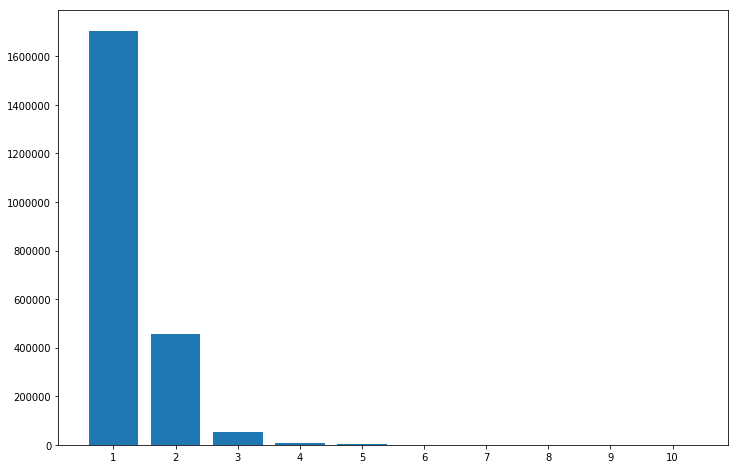

In [8]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

freq, counts = np.unique(np.array(sources_per_record), return_counts = True)

plt.figure(figsize=(12,8))
plt.bar(range(len(freq)), counts)
plt.xticks(range(len(freq)), freq)

plt.show()